In [81]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [82]:
data = pd.read_csv('googleplaystore.csv',sep=',')
data.shape

(10841, 13)

In [83]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [84]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [85]:
mydata = data.dropna(axis=0)

In [86]:
mydata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [87]:
mydata.shape

(9360, 13)

In [88]:
mydata.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [89]:
mydata['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [90]:
mydata['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [91]:
avg_rating = mydata['Rating'].mean()

In [92]:
mydata['RatingReview'] = np.where(mydata['Rating']<avg_rating,'Bad','Good')
mydata.RatingReview.value_counts()

C:\Users\aishu\AppData\Local\Temp/ipykernel_3496/485681234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['RatingReview'] = np.where(mydata['Rating']<avg_rating,'Bad','Good')


Good    6089
Bad     3271
Name: RatingReview, dtype: int64

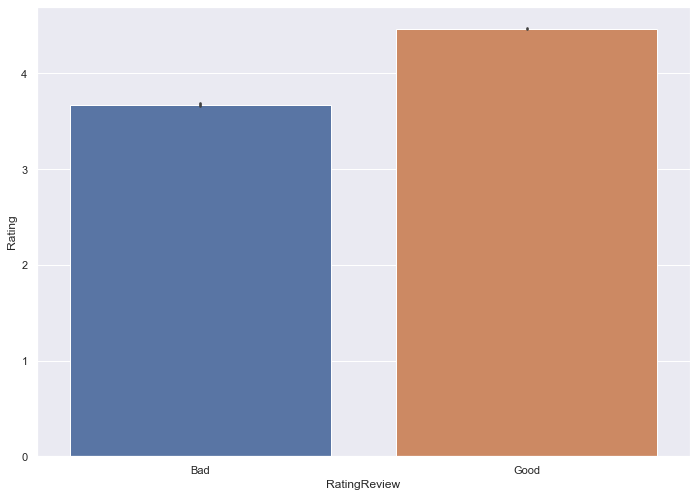

In [93]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
review_check = sns.barplot(x=mydata['RatingReview'], y=mydata['Rating'], data=mydata)

<function matplotlib.pyplot.show(close=None, block=None)>

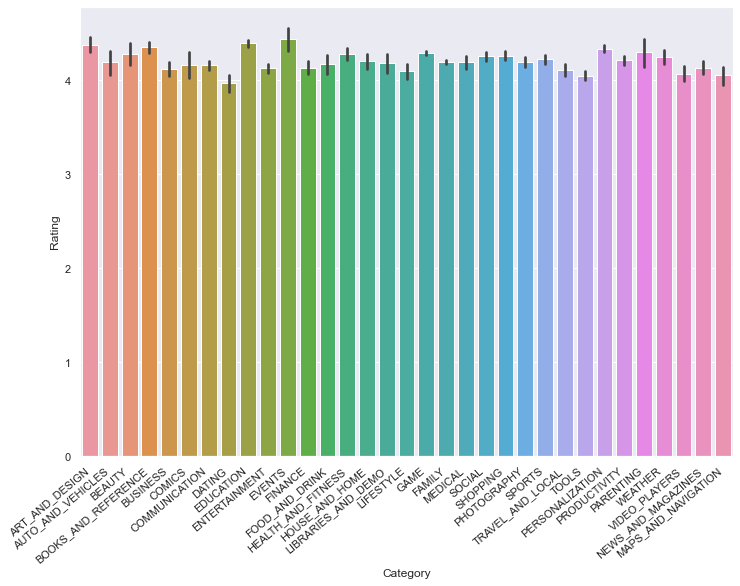

<Figure size 14400x64800 with 0 Axes>

In [94]:
category_wise_rating = sns.barplot(x=mydata['Category'],y=mydata['Rating'],data=mydata)
category_wise_rating.set_xticklabels(category_wise_rating.get_xticklabels(), rotation=40, ha="right")
plt.figure(figsize=(200,900))
plt.show

In [95]:
mydata = mydata.drop('Last Updated',axis=1)

In [96]:
mydata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'RatingReview'],
      dtype='object')

In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
mydata['Category'] = encoder.fit_transform(mydata['Category'])
mydata['Type'] = encoder.fit_transform(mydata['Type'])
mydata['Content Rating'] = encoder.fit_transform(mydata['Content Rating'])
mydata['Genres'] = encoder.fit_transform(mydata['Genres'])
mydata['RatingReview'] = encoder.fit_transform(mydata['RatingReview'])

In [98]:
mydata.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,RatingReview
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,"10,000+",0,0,1,9,1.0.0,4.0.3 and up,0
1,Coloring book moana,0,3.9,967,14M,"500,000+",0,0,1,11,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,"5,000,000+",0,0,1,9,1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,0,4.5,215644,25M,"50,000,000+",0,0,4,9,Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,"100,000+",0,0,1,10,1.1,4.4 and up,1


In [99]:
mydata['Installs']= mydata['Installs'].str.rstrip('+')
mydata['Installs']= mydata['Installs'].str.replace(',','')
mydata['Size']= mydata['Size'].str.rstrip('M')

In [100]:
mydata['Installs'] = mydata['Installs'].astype(int)
mydata['Installs'] = np.where(mydata['Installs']>500000,'1','0')
mydata.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,RatingReview
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19,0,0,0,1,9,1.0.0,4.0.3 and up,0
1,Coloring book moana,0,3.9,967,14,0,0,0,1,11,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7,1,0,0,1,9,1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,0,4.5,215644,25,1,0,0,4,9,Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8,0,0,0,1,10,1.1,4.4 and up,1


In [101]:
final_data = pd.DataFrame(mydata,columns=['Category','Installs','Type','Content Rating','Genres','RatingReview'])
final_data.head(5)

,Category,Installs,Type,Content Rating,Genres,RatingReview
0,0,0,0,1,9,0
1,0,0,0,1,11,0
2,0,1,0,1,9,1
3,0,1,0,4,9,1
4,0,0,0,1,10,1


In [102]:
x = final_data.iloc[:,final_data.columns!='RatingReview']
y = final_data.iloc[:,4]

RandomForest Classifier


In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

(7020, 5)
(7020,)
(2340, 5)
(2340,)
Training Accuracy : 1.0
Testing Accuracy : 0.9811965811965812


KNN Model


In [104]:
from sklearn.neighbors import KNeighborsClassifier
x = final_data.iloc[:,final_data.columns!='RatingReview']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)
y = final_data.iloc[:,4]
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(x_train, y_train)
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
probs = pd.DataFrame(knn_model.predict_proba(x_test))

In [105]:
print("Training Accuracy :", knn_model.score(x_train, y_train))
print("Testing Accuracy :", knn_model.score(x_test, y_test))

Training Accuracy : 0.9806166056166056
Testing Accuracy : 0.9604700854700855


Logistic Regression


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
final_data1 = pd.DataFrame(mydata,columns=['Category','Installs','Type','Content Rating','RatingReview','Genres'])
x = final_data1.iloc[:,final_data1.columns!='Genres']
y = final_data1.iloc[:,4]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = pd.Series(model.predict(x_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0
